# Color Frequencies:

This notebook walks through how to pullout color information from an image that it passed. The purpose for this information is to get the highest frequncy color (and with hindsight the highest cluster)/ 

In [13]:
from IPython.display import Image

##### Please Note:

This notebook reference details and code from this article: https://towardsdatascience.com/finding-most-common-colors-in-python-47ea0767a06a

###### ALSO:

Camoflauge are composed of anywhere from 4 to 7+ colors for their paterns:

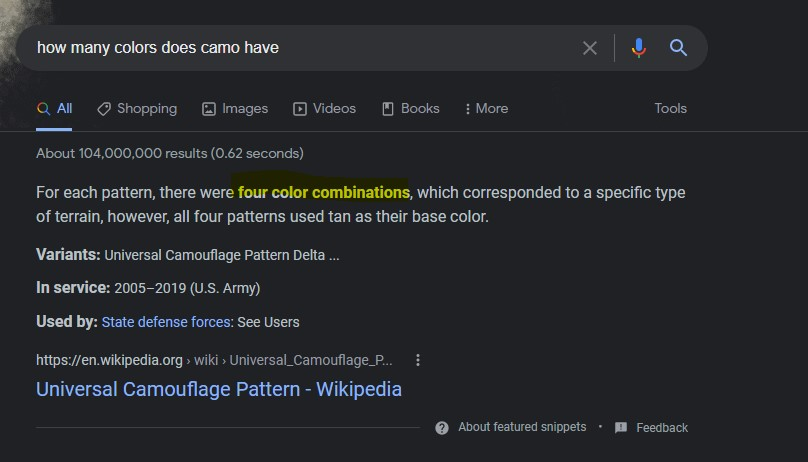

In [14]:
Image(filename='How_many_camo_colors.jpg') 

In [3]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached scikit_learn-1.0.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=bd5f73fb519e9af03fd44231a882508616bb41df67b076880b3a66adb58372f0
  Stored in directory: c:\users\mtapi\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

In [18]:
from sklearn.cluster import KMeans
from collections import Counter

def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()


def palette_perc(img_path: str, clusters: int):
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    dim = (500, 300) #set dim to whatever here
    img = cv.resize(img, dim, interpolation = cv.INTER_AREA)

    clt = KMeans(n_clusters=clusters)
    k_cluster = clt.fit(img.reshape(-1, 3))
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
    #visualize results:
    show_img_compar(img, palette)
    return palette
    

{0: 0.28, 1: 0.22, 2: 0.22, 3: 0.16, 4: 0.12}
[[ 55.32711584  85.32375887  13.18113475]
 [144.17810215 187.97875762 251.3160562 ]
 [ 65.93409467 139.18936138 250.70833959]
 [118.50933356 160.70664721  31.4759473 ]
 [225.15350322 239.47223292 252.68677418]]


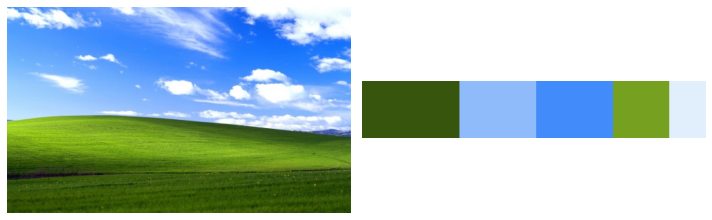

array([[[ 55,  85,  13],
        [ 55,  85,  13],
        [ 55,  85,  13],
        ...,
        [225, 239, 252],
        [225, 239, 252],
        [225, 239, 252]],

       [[ 55,  85,  13],
        [ 55,  85,  13],
        [ 55,  85,  13],
        ...,
        [225, 239, 252],
        [225, 239, 252],
        [225, 239, 252]],

       [[ 55,  85,  13],
        [ 55,  85,  13],
        [ 55,  85,  13],
        ...,
        [225, 239, 252],
        [225, 239, 252],
        [225, 239, 252]],

       ...,

       [[ 55,  85,  13],
        [ 55,  85,  13],
        [ 55,  85,  13],
        ...,
        [225, 239, 252],
        [225, 239, 252],
        [225, 239, 252]],

       [[ 55,  85,  13],
        [ 55,  85,  13],
        [ 55,  85,  13],
        ...,
        [225, 239, 252],
        [225, 239, 252],
        [225, 239, 252]],

       [[ 55,  85,  13],
        [ 55,  85,  13],
        [ 55,  85,  13],
        ...,
        [225, 239, 252],
        [225, 239, 252],
        [225, 239, 252]]

In [19]:
image = "..\data\microsoft_landscape_demo.jpg"

palette_perc(image, clusters=5)

{0: 0.18, 1: 0.16, 2: 0.15, 3: 0.24, 4: 0.28}
[[209.69006627  98.03391462  46.82757599]
 [ 59.943717    66.1358348    5.59910703]
 [239.1371056  205.25469633 111.40078424]
 [117.26520366 123.00462597  14.66475798]
 [205.86914496 154.11939311  66.87512407]]


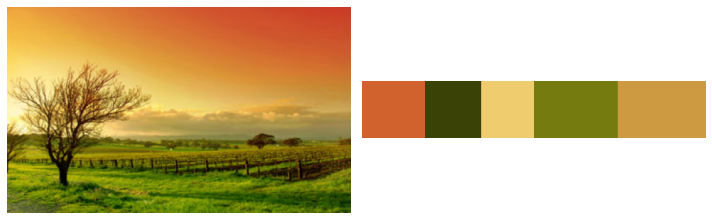

array([[[209,  98,  46],
        [209,  98,  46],
        [209,  98,  46],
        ...,
        [205, 154,  66],
        [205, 154,  66],
        [205, 154,  66]],

       [[209,  98,  46],
        [209,  98,  46],
        [209,  98,  46],
        ...,
        [205, 154,  66],
        [205, 154,  66],
        [205, 154,  66]],

       [[209,  98,  46],
        [209,  98,  46],
        [209,  98,  46],
        ...,
        [205, 154,  66],
        [205, 154,  66],
        [205, 154,  66]],

       ...,

       [[209,  98,  46],
        [209,  98,  46],
        [209,  98,  46],
        ...,
        [205, 154,  66],
        [205, 154,  66],
        [205, 154,  66]],

       [[209,  98,  46],
        [209,  98,  46],
        [209,  98,  46],
        ...,
        [205, 154,  66],
        [205, 154,  66],
        [205, 154,  66]],

       [[209,  98,  46],
        [209,  98,  46],
        [209,  98,  46],
        ...,
        [205, 154,  66],
        [205, 154,  66],
        [205, 154,  66]]

In [20]:
image2 = "..\data\landscape-demo2.jpg"

palette_perc(image2, clusters=5)

{0: 0.3, 1: 0.22, 2: 0.24, 3: 0.17, 4: 0.07}
[[230.49347523 241.10797372 247.37301444]
 [116.33006282 100.06829195  49.25387377]
 [ 35.89195454  36.25080568  19.55809352]
 [205.00891147 165.15321477  58.53777604]
 [173.79229736 171.6679803  153.68849082]]


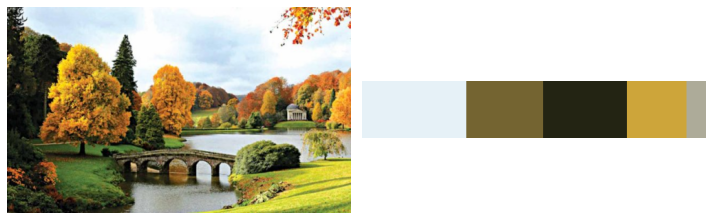

array([[[230, 241, 247],
        [230, 241, 247],
        [230, 241, 247],
        ...,
        [173, 171, 153],
        [173, 171, 153],
        [173, 171, 153]],

       [[230, 241, 247],
        [230, 241, 247],
        [230, 241, 247],
        ...,
        [173, 171, 153],
        [173, 171, 153],
        [173, 171, 153]],

       [[230, 241, 247],
        [230, 241, 247],
        [230, 241, 247],
        ...,
        [173, 171, 153],
        [173, 171, 153],
        [173, 171, 153]],

       ...,

       [[230, 241, 247],
        [230, 241, 247],
        [230, 241, 247],
        ...,
        [173, 171, 153],
        [173, 171, 153],
        [173, 171, 153]],

       [[230, 241, 247],
        [230, 241, 247],
        [230, 241, 247],
        ...,
        [173, 171, 153],
        [173, 171, 153],
        [173, 171, 153]],

       [[230, 241, 247],
        [230, 241, 247],
        [230, 241, 247],
        ...,
        [173, 171, 153],
        [173, 171, 153],
        [173, 171, 153]]

In [21]:
image3 = "..\data\landscape-demo3_noclouds.jpg"

palette_perc(image3, clusters=5)